In [1]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt

In [3]:
all_files = glob.glob('../data/NREL/*.csv')
all_files
df = pd.concat((pd.read_csv(f, skiprows = 2) for f in all_files), ignore_index=True)

In [4]:
df['Time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])

In [5]:
df = df.set_index('Time')

In [6]:
df = df.drop(columns = ['Year', 'Month', 'Day', 'Hour', 'Minute'])

In [7]:
df.min()
df.max()

Wind Speed    6.3
dtype: float64

array([[<AxesSubplot:title={'center':'Wind Speed'}>]], dtype=object)

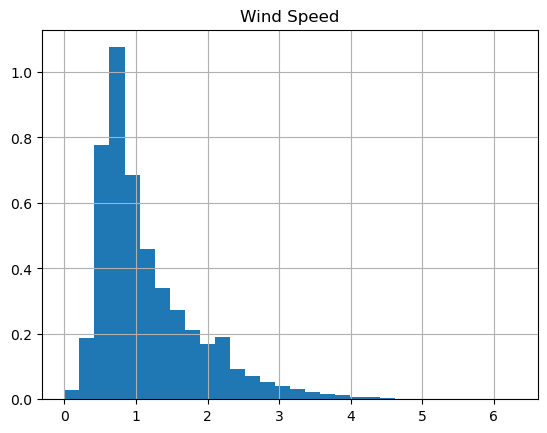

In [8]:
df.hist(bins = 30, density = True)

In [27]:
import numpy as np
np.linspace(-0.5,6.5,8)

array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5])

array([[<AxesSubplot:title={'center':'Wind Speed'}>]], dtype=object)

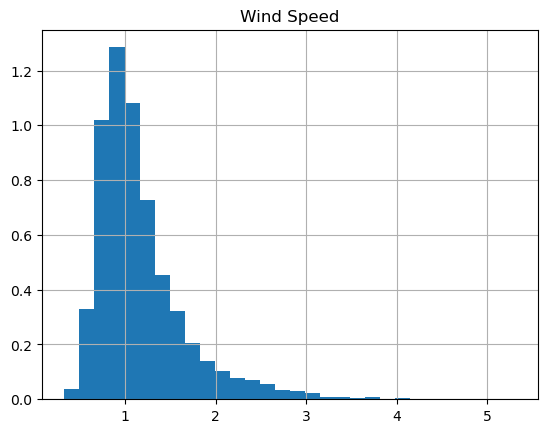

In [13]:
df['Date']=df.index.date
df_dailyMean = df.groupby(by='Date').mean()
df_dailyMean.hist(bins = 30, density = True)

In [25]:
def weibull_PDF(u,k,a):
    pdf = k/a*(u/a)**(k-1)*np.exp(-(u/a)**k)
    return pdf 

In [28]:
def gumbel_PDF(u,mu,a):
    z = (u-mu)/a
    pdf = 1/a * np.exp(- z - np.exp(z))
    return pdf


In [29]:
def inverseWeibull_PDF(u,k,a):
    pdf = k/a * (k/a)**(k+1) * np.exp(-(a/u)**k)
    return pdf

In [40]:
def genExtremeValue_PDF(u,k,mu,a):
    z = (u-mu)/a
    pdf = 1/a *(1-k/a*z)**(1/k-1) - np.exp(-(1-k/a*z)**(1/k))
    return pdf

In [40]:
u_hat  = np.linspace(0,6.5,100)

C:\Users\gerkentx\AppData\Local\Temp\ipykernel_32736\2079943113.py:2: RuntimeWarning: divide by zero encountered in power
  pdf = k/c*(u/c)**(k-1)*np.exp(-(u/c)**k)


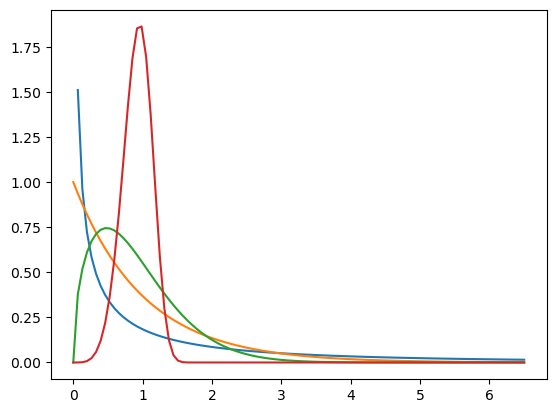

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure 

klist = [0.5, 1, 1.5, 5]

for k in klist: 
    pdf = weibull_PDF(u_hat,k,1)
    plt.plot(u_hat,pdf)

<Figure size 640x480 with 0 Axes>

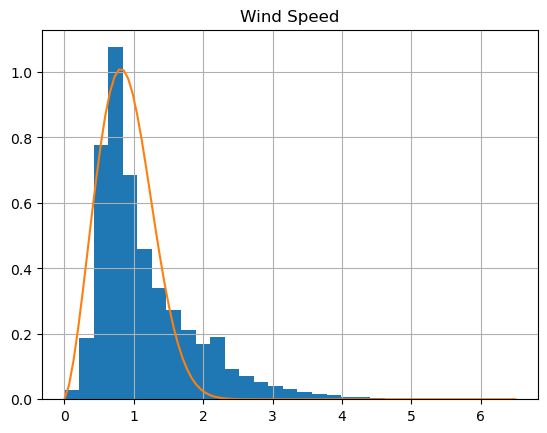

In [66]:
k = 2.5
c =1
plt.figure()
ax = df.hist(bins = 30, density = True)
plt.plot(u_hat,weibull_PDF(u_hat,k,c))

In [74]:
count, division = np.histogram(df['Wind Speed'], bins = 30, density = True)
count
np.delta(division)

AttributeError: module 'numpy' has no attribute 'delta'

In [78]:
(division[:-1]+division[1:])/2

array([0.105, 0.315, 0.525, 0.735, 0.945, 1.155, 1.365, 1.575, 1.785,
       1.995, 2.205, 2.415, 2.625, 2.835, 3.045, 3.255, 3.465, 3.675,
       3.885, 4.095, 4.305, 4.515, 4.725, 4.935, 5.145, 5.355, 5.565,
       5.775, 5.985, 6.195])

In [79]:
from scipy.optimize import curve_fit
u=(division[:-1]+division[1:])/2
curve_fit(weibull_PDF, u ,count)


(array([2.15610782, 1.05585435]),
 array([[ 0.02035924, -0.00024653],
        [-0.00024653,  0.00183204]]))

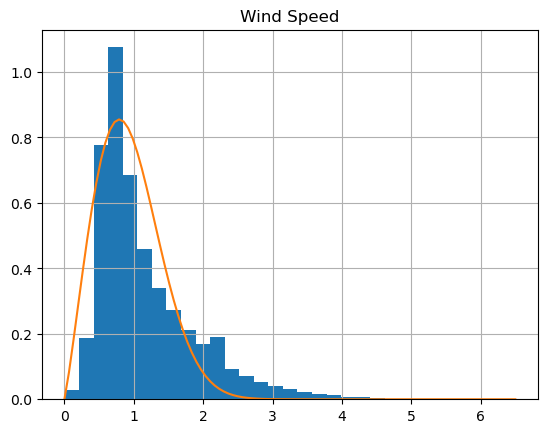

In [84]:
y_hat = weibull_PDF(u_hat,2.15610782, 1.05585435)
ax = df.hist(bins = 30, density = True)
plt.plot(u_hat,y_hat)

In [19]:
count, division = np.histogram(df_dailyMean['Wind Speed'], bins = 30, density = True)
count


array([3.63156990e-02, 3.28822147e-01, 1.02080128e+00, 1.28491546e+00,
       1.08022697e+00, 7.25653694e-01, 4.53616094e-01, 3.21559007e-01,
       2.04028200e-01, 1.41301083e-01, 1.01683957e-01, 7.85739669e-02,
       6.93299708e-02, 5.54639766e-02, 3.30142718e-02, 2.97128446e-02,
       2.11291339e-02, 9.90428154e-03, 7.26313979e-03, 5.94256892e-03,
       7.92342523e-03, 1.98085631e-03, 3.30142718e-03, 6.60285436e-04,
       0.00000000e+00, 1.32057087e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.60285436e-04])

In [25]:
from scipy.optimize import curve_fit
u=(division[:-1]+division[1:])/2
param, p = curve_fit(weibull_PDF, u ,count)


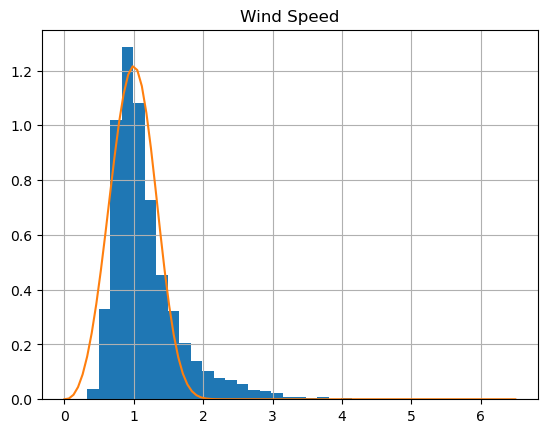

In [28]:
u_hat  = np.linspace(0,6.5,100)
y_hat = weibull_PDF(u_hat,param[0], param[1])
ax = df_dailyMean.hist(bins = 30, density = True)
plt.plot(u_hat,y_hat)

Tutorial_Python_Geospatial.ipynb
https://colab.research.google.com/drive/1B7gFBSr0eoZ5IbsA0lY8q3XL8n-3BOn4#scrollTo=wfU1toD9yd23


https://github.com/royalosyin/A-Beginner-Guide-to-Carry-out-Extreme-Value-Analysis-with-Codes-in-Python/blob/master/extremeMultipleDistributions.ipynb
https://pypi.org/project/lmoments/

https://www.stat.berkeley.edu/~paciorek/presentations/paciorek-imsc19.pdf
https://github.com/climate-and-health-datasci-Unicamp/py-climate-health-toolbox/blob/master/examples/IAC_heatwave_analyses.ipynb

https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00093736/detail


In [2]:
weather_phoenix = pd.read_csv('../data/NOAA_GHCN_USW00023183.csv',
                             parse_dates=['DATE'],
                             index_col = ['DATE'])
weather_phoenix.head()

C:\Users\gerkentx\AppData\Local\Temp\ipykernel_5260\3683832410.py:1: DtypeWarning: Columns (16,22,26,28,32,34,38,40,44,46) have mixed types. Specify dtype option on import or set low_memory=False.
  weather_phoenix = pd.read_csv('../data/NOAA_GHCN_USW00023183.csv',


,STATION,NAME,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,PGTM,PGTM_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,...,WSF2,WSF2_ATTRIBUTES,WSF5,WSF5_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES,WSFI,WSFI_ATTRIBUTES,WSFM,WSFM_ATTRIBUTES
DATE,,,,,,,,,,,,,,,,,,,,,
1934-01-01,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-02,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-03,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-04,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1934-01-05,USW00023183,"PHOENIX AIRPORT, AZ US",NaN,NaN,NaN,NaN,NaN,NaN,0.0,"P,,6,null",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather_phoenix.columns

Index(['STATION', 'NAME', 'AWND', 'AWND_ATTRIBUTES', 'FMTM', 'FMTM_ATTRIBUTES',
       'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW',
       'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES',
       'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'TOBS',
       'TOBS_ATTRIBUTES', 'WDF1', 'WDF1_ATTRIBUTES', 'WDF2', 'WDF2_ATTRIBUTES',
       'WDF5', 'WDF5_ATTRIBUTES', 'WDFG', 'WDFG_ATTRIBUTES', 'WDFI',
       'WDFI_ATTRIBUTES', 'WDFM', 'WDFM_ATTRIBUTES', 'WSF1', 'WSF1_ATTRIBUTES',
       'WSF2', 'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WSFG',
       'WSFG_ATTRIBUTES', 'WSFI', 'WSFI_ATTRIBUTES', 'WSFM',
       'WSFM_ATTRIBUTES'],
      dtype='object')

In [15]:
wnd_phoenix = weather_phoenix[['AWND']]
wnd_phoenix

,AWND
DATE,
1934-01-01,NaN
1934-01-02,NaN
1934-01-03,NaN
1934-01-04,NaN
1934-01-05,NaN
...,...
2024-03-24,12.97
2024-03-25,8.50
2024-03-26,9.40


In [16]:
wnd_phoenix=wnd_phoenix.dropna()

In [10]:
wnd_phoenix.describe()

count    14692.000000
mean         6.154301
std          2.221693
min          0.450000
25%          4.700000
50%          5.820000
75%          7.610000
max         20.130000
Name: AWND, dtype: float64

array([[<AxesSubplot:title={'center':'AWND'}>]], dtype=object)

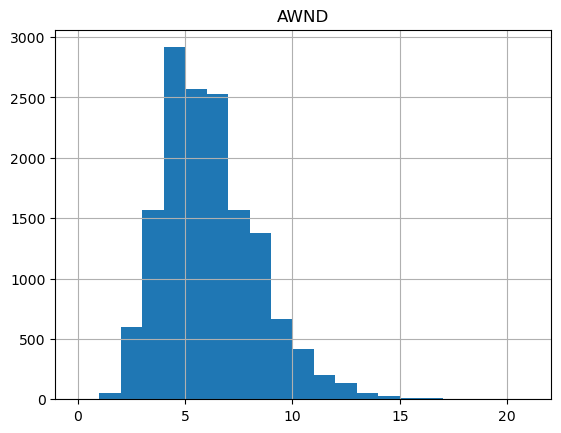

In [17]:
wnd_phoenix.hist(bins = np.arange(0,22))

In [18]:
count, division = np.histogram(wnd_phoenix['AWND'], np.arange(0,22), density = True)
count

array([2.04192758e-04, 3.74353390e-03, 4.08385516e-02, 1.06520555e-01,
       1.98407296e-01, 1.75061258e-01, 1.71794174e-01, 1.06928941e-01,
       9.37244759e-02, 4.49904710e-02, 2.81105363e-02, 1.34767220e-02,
       9.05254560e-03, 3.33514838e-03, 1.76967057e-03, 8.16771032e-04,
       9.52899537e-04, 6.80642527e-05, 6.80642527e-05, 6.80642527e-05,
       6.80642527e-05])

In [41]:
from scipy.optimize import curve_fit
u=(division[:-1]+division[1:])/2
param_wb, p = curve_fit(weibull_PDF, u ,count)
param_gb, p = curve_fit(gumbel_PDF, u ,count)
param_iwb, p = curve_fit(inverseWeibull_PDF, u ,count)
param_gev, p = curve_fit(genExtremeValue_PDF, u ,count)

print(param)

[3.07189677 6.45500967]


C:\Users\gerkentx\AppData\Local\Temp\ipykernel_5260\3800514395.py:2: RuntimeWarning: invalid value encountered in power
  pdf = k/a*(u/a)**(k-1)*np.exp(-(u/a)**k)
C:\Users\gerkentx\AppData\Local\Temp\ipykernel_5260\3664638803.py:2: RuntimeWarning: invalid value encountered in scalar power
  pdf = k/a * (k/a)**(k+1) * np.exp(-(a/u)**k)
C:\Users\gerkentx\AppData\Local\Temp\ipykernel_5260\2582618309.py:3: RuntimeWarning: invalid value encountered in power
  pdf = 1/a *(1-k/a*z)**(1/k-1) - np.exp(-(1-k/a*z)**(1/k))


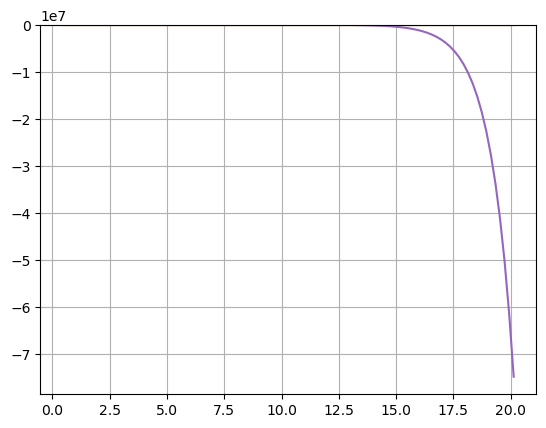

In [48]:
min = wnd_phoenix['AWND'].min()
max = wnd_phoenix['AWND'].max()
u_hat  = np.linspace(min,max,100)
y_hat_wb = weibull_PDF(u_hat,param_wb[0], param_wb[1])
y_hat_gb = gumbel_PDF(u_hat,param_gb[0], param_gb[1])
y_hat_iwb = inverseWeibull_PDF(u_hat,param_iwb[0], param_iwb[1])
y_hat_gev = genExtremeValue_PDF(u_hat,param_gev[0], param_gev[1],param_gev[2])

ax = wnd_phoenix['AWND'].hist(bins = 30, density = True)
plt.plot(u_hat,y_hat_wb, label = 'Weibull')
#plt.plot(u_hat,y_hat_gb, label = 'Gumbel')
#plt.plot(u_hat,y_hat_iwb, label = 'Inv Weibull')
#plt.plot(u_hat,y_hat_gev, label = 'Gen Extreme Value')


In [50]:
param_gb

array([19.50510734, 18.99244552])